In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [12]:
def Model(u, time, rotation_speed, epsilon):
    phi, omega = u
    gamma = radius * rotation_speed ** 2 / g
    dphi = omega 
    domega = (np.sin(phi) * (gamma * np.cos(phi) - 1) - omega)/epsilon
    return dphi, domega

def DampedModel(phi, time, rotation_speed):
    gamma = radius * rotation_speed ** 2 / g
    dphi = np.sin(phi) * (gamma * np.cos(phi) - 1)
    return dphi

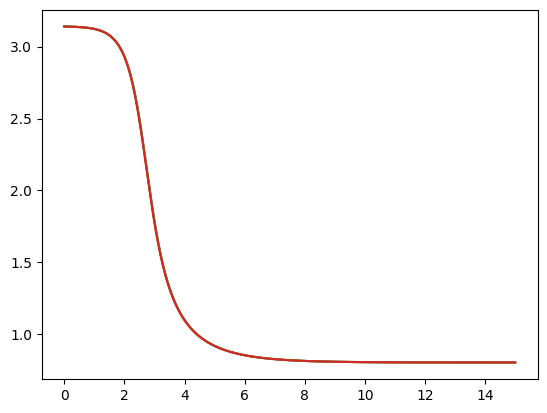

In [38]:
radius = 1.0  # Radius of the circle
time = np.linspace(0, 15, 1000)
g = 9.8  # Acceleration due to gravity (m/s^2)
rotation_speed = 1.2 * np.sqrt(g / radius)
epsilon = .00001

phi0 = 3.14
sol = odeint(DampedModel, phi0, time, args=(rotation_speed,))
phi = sol[:, 0]
plt.plot(time, phi)

omega0 = -1
sol = odeint(Model, [phi0, omega0], time, args=(rotation_speed, epsilon))
phi = sol[:, 0]
plt.plot(time, phi)

omega0 = -2
sol = odeint(Model, [phi0, omega0], time, args=(rotation_speed, epsilon))
phi = sol[:, 0]
plt.plot(time, phi)

omega0 = -5
sol = odeint(Model, [phi0, omega0], time, args=(rotation_speed, epsilon))
phi = sol[:, 0]
plt.plot(time, phi)
#plt.axis([0, 2, 3, 3.2])

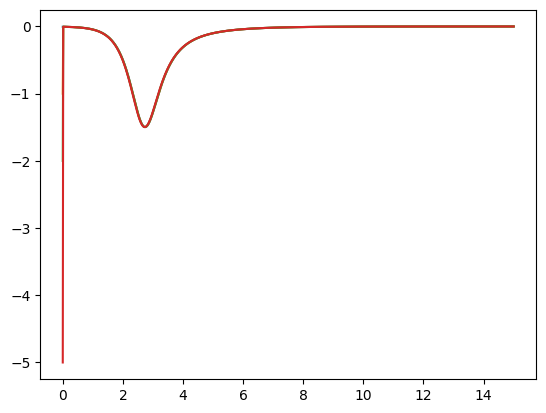

In [46]:
epsilon = .00001

phi0 = 3.14
sol = odeint(DampedModel, phi0, time, args=(rotation_speed,))
phi = sol[:, 0]
gamma = radius * rotation_speed ** 2 / g
plt.plot(time, np.sin(phi) * (gamma * np.cos(phi) - 1))

omega0 = -1
sol = odeint(Model, [phi0, omega0], time, args=(rotation_speed, epsilon))
omega = sol[:, 1]
plt.plot(time, omega)

omega0 = -2
sol = odeint(Model, [phi0, omega0], time, args=(rotation_speed, epsilon))
omega = sol[:, 1]
plt.plot(time, omega)

omega0 = -5
sol = odeint(Model, [phi0, omega0], time, args=(rotation_speed, epsilon))
omega = sol[:, 1]
plt.plot(time, omega)
